# The Binary Classification Problem

So far I've covered Neural Networks in the context of regression, i.e. approximating continous functions. However in the real world many use cases require approximating functions with discrete values. Classic examples of this are things like image detection, such as "does a patient have breast cancer or not?" To give a better example of this, I will introduce a dataset that we can examine prior to getting into the details of how to tackle this problem.

## The Breast Cancer dataset
To work with this we will need to use sklearn's breast cancer dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load the breast_cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [2]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

We can see here that the dataset's feature values are continuous and the labels are discrete. So how can we approximate the labels using the features? The first step is luckily something I've covered before. The sigmoid function, recall that it has the convenient property of clamping any value in $\mathbb{R}$ between the interval [0,1]. That means that by defining a neural network similarly to how we did under Linear Regression but applying the sigmoid function as an activation to the final layer, the neural network can be treated as a function that estimates the probability that a feature vecttor corresponds to a 1. In this particular case 1 represents the boolean answer to the question "Does the patient have breast cancer?".

In [4]:
def sigmoid(x):
    return np.exp(x) / ( 1 + np.exp(x))
    

Text(0, 0.5, 'sigmoid(x)')

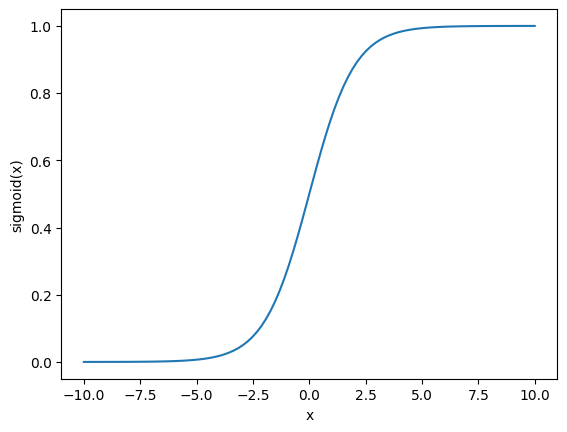

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
# graphing the sigmoid function
fa = np.linspace(-10, 10, 100) 


a = sigmoid(fa)
plt.plot(fa, a) 
plt.xlabel("x") 
plt.ylabel("sigmoid(x)")

## The loss function in binary classification

The probability estimation given by the output of the neural network's forward pass is nice, but how do we optimize the network? How do we perform gradient descent on the network if it's giving probabilities, the MSE loss won't work because the loss will always be tiny. At most the loss will only ever be 1, and if the neural consistently guesses .5 the loss function will be .25 for values of both 0 and 1. The main solution to this problem is the Binary Cross Entropy Loss Function.

### The Binary Cross Entropy Loss Function
The binary cross entropy loss can be defined as $$L = - [y \cdot \ln (\hat{y}) + (1 - y) \cdot \ln( 1 - \hat{y})]$$
Where $ln$ refers to the natural log and $\hat{y}$ refers to the output of the neural network with the sigmoid function applied to it. 

Text(0, 0.5, 'natual log(x)')

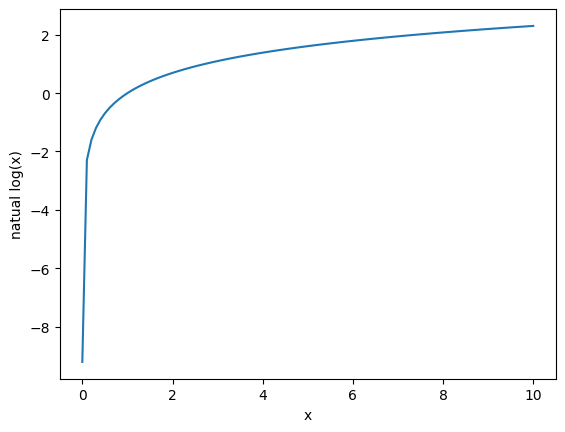

In [6]:
#graphing the natural log function
fa = np.linspace(1e-4, 10, 100) 


a = np.log(fa)
plt.plot(fa, a) 
plt.xlabel("x") 
plt.ylabel("natual log(x)")

The cross entropy loss gives a much better identification of how "off" a model from the target, while also being continuous, when $$y = 1,\hat{y} = .5, L = .693$$
$$y = 0,\hat{y} = .5, L = .693$$

The values are still small at $.5$ but it is at least a higher penalty than $.25$ with MSE, furthermore the true value of the Cross Entropy loss lies closer to 0 and one when $$y = 1, \hat{y} = .1 , L = 2.3$$ $$y = 0,\hat{y} = .1 , L =.10$$

### Graphing the difference between MSE and Binary Cross entropy

To get a better understanding of what is going on, I've provided a graph showing how the Binary Cross Entropy Loss function looks vs the MSE Loss

In [7]:
def cross_entropy_loss(y,y_hat):
    return -np.sum(y * np.log(y_hat) + ( 1 - y) * np.log(1 - y_hat))

In [12]:
def mse_loss(targets,outputs):
    return np.mean((targets - outputs) ** 2)


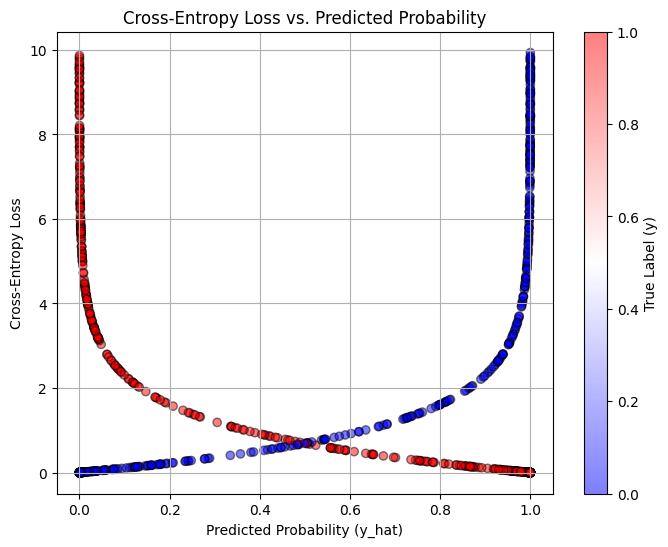

Average Cross-Entropy Loss: 2.5403


In [13]:
import matplotlib.pyplot as plt 
import numpy as np 

num_samples = 1000


y = np.random.randint(0, 2, size=num_samples)


raw_predictions = np.random.uniform(-10, 10, size=num_samples)

y_hat = sigmoid(raw_predictions)


loss = - (y * np.log(y_hat) + ( 1 - y) * np.log(1 - y_hat))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_hat, loss, alpha=0.5, c=y, cmap='bwr', edgecolors='k', label='Loss per sample')
plt.xlabel("Predicted Probability (y_hat)") 
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Predicted Probability")
plt.colorbar(scatter, label='True Label (y)')
plt.grid(True)
plt.show()

average_loss = cross_entropy_loss(y, y_hat) / num_samples
print(f"Average Cross-Entropy Loss: {average_loss:.4f}")


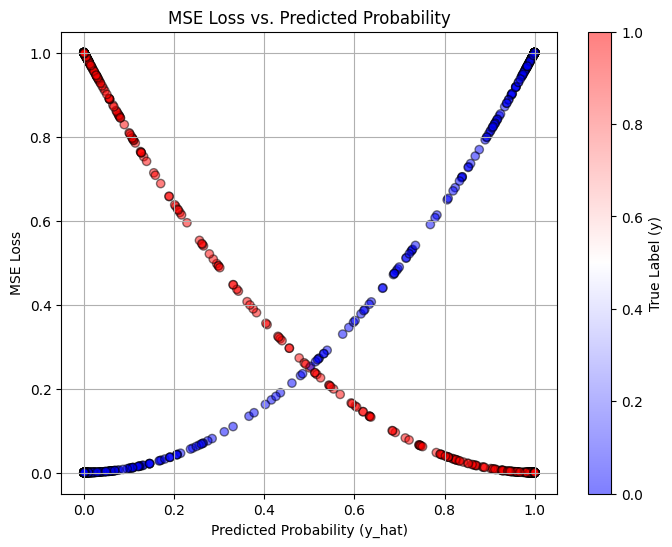

Average MSE Loss: 0.0004


In [14]:
import matplotlib.pyplot as plt 
import numpy as np 

num_samples = 1000


y = np.random.randint(0, 2, size=num_samples)


raw_predictions = np.random.uniform(-10, 10, size=num_samples)

y_hat = sigmoid(raw_predictions)


loss = (y - y_hat)**2

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_hat, loss, alpha=0.5, c=y, cmap='bwr', edgecolors='k', label='Loss per sample')
plt.xlabel("Predicted Probability (y_hat)") 
plt.ylabel("MSE Loss")
plt.title("MSE Loss vs. Predicted Probability")
plt.colorbar(scatter, label='True Label (y)')
plt.grid(True)
plt.show()

average_loss = mse_loss(y, y_hat) / num_samples
print(f"Average MSE Loss: {average_loss:.4f}")

## Gradient Descent using the Cross Entropy Loss Function using Logistic Regression
In order to get a good understanding of how a model might work, I will begin with the most basic model. Logistic Regression, that is, a model defined as $$\hat{y} =\sigma( x_1 w_1 + x_2 w_2 + x_3 w_3 + ...+ x_n w_n + b) $$ $$\hat{y} = \sigma(X \cdot W + b) $$

$$L = - [y \cdot \ln (\hat{y}) + (1 - y) \cdot \ln( 1 - \hat{y})]$$


$$\frac{\partial L }{\partial \hat{y}} = -y \cdot \frac{1}{\hat{y}}  + - [(1 - y) \cdot \frac{-1}{1 - \hat{y}}]$$
$$\frac{\partial L }{\partial \hat{y}} =  \frac{-y}{\hat{y}}  +  \frac{ 1 - y}{1 - \hat{y}}$$
$$\frac{\partial L }{\partial \hat{y}} =  \frac{-y (1 - \hat{y})}{(1 - \hat{y})\hat{y}}  +  \frac{\hat{y}  (1 - y)}{\hat{y} (1 - \hat{y})}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{-y + y\hat{y} + \hat{y} - y \hat{y}}{\hat{y} - \hat{y}\hat{y}}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{\hat{y} - y}{ \hat{y} - \hat{y} \hat{y}}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) }$$

To find the gradient of a given $w_i$ we now need $$\frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_i}$$
$$\frac{\partial \hat{y}}{\partial w_i} = \frac{\partial \sigma(X \cdot W + b) }{\partial w_i} \cdot \frac{\partial (X \cdot W + b)}{\partial w_i}$$
$$\frac{\partial \sigma(X \cdot W) }{\partial w_i} = \sigma(X \cdot W + b) \cdot (1 - \sigma(X \cdot W + b))$$
$$\frac{\partial X \cdot W}{\partial w_i} = x_i$$
$$\frac{\partial L}{\partial w_i} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) } \cdot \sigma(X \cdot W + b) \cdot (1 - \sigma(X \cdot W + b)) \cdot x_i $$
because $\sigma(X \cdot W + b)  = \hat{y}$ 
$$\frac{\partial L}{\partial w_i} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) } \cdot \hat{ y}\cdot (1 - \hat{y}) \cdot x_i $$
$$\frac{\partial L}{\partial w_i} = (\hat{y} - y ) \cdot x_i$$
$$ \frac{\partial L}{\partial W} = (\hat{y} - y ) \cdot X$$

## BackPropagation with Binary Cross Entropy

This however only describes the most basic model, we however want more complicated Neural Networks, so we will describe a network
$$\hat{y} = \sigma( \sigma(\sigma(x \bullet w_1 + b_1) \bullet w_2 + b_2) \bullet w_3 + b_3)$$

The processes works fairly similarly to how it did in linear regression, the key difference is the output activation that we have to worry about so we will begin by deriving $\nabla W_3$ we need $$\frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial W_3}$$

In [ ]:
import numpy as np
class LinearModel(object):
    def __init__(self,number_of_features):
        self.weights = np.random.randn(number_of_features,1)
        self.bias = np.random.randn(1)

    def forward(self,x):
        return np.matmul(x,self.weights) + self.bias

In [ ]:
def stable_sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

def sigmoid(x):
    return stable_sigmoid(x)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)